# Lcviz Notebook
This is an auto-generated Jupyter notebook to access the product file(s) **tess2021204101404-s0041-0000000441763252-0212-s_lc.fits** using the
[Lcviz](https://lcviz.readthedocs.io/en/latest/) Python package. 

### Required Packages
This notebook requires the `lcviz` and `astroquery` Python packages.
To install or update `lcviz`, please run:

`pip install -U lcviz`

to install the latest version.  This notebook attempts to download the data using
[astroquery](https://astroquery.readthedocs.io/en/latest/), and requires `astroquery >= 0.4.3`.
To install or update `astroquery`, please run:

`pip install -U astroquery`

### MAST Authentication
If the data are not public, it will attempt to authenticate using your MAST API authentication token. If you do not have one,
see [MAST Auth Info](https://auth.mast.stsci.edu/info) to learn how to create a new token. After creating a valid auth token,
set it to a new environment variable called **MAST_API_TOKEN**.  You can do this either in this notebook using
[os.environ](https://docs.python.org/3/library/os.html#os.environ) or by setting the environment variable in your terminal shell
environment and restarting this notebook.

### Running this notebook
To open this notebook, open a terminal and navigate to the directory where this file is located.  Run the following command:

`jupyter notebook lcviz_notebook_tess2021204101404-s0041-0000000441763252-0212-s_lc.fits.ipynb`

Once open you can run the individual cells below by selecting a cell and hitting `shift+enter`.  Or run all cells by
clicking "Cell -> Run All" from the menu above.


In [1]:
import os
from astroquery.mast import Observations
from lcviz import LCviz

In [ ]:
# get authentication token and login
auth_token = os.environ.get('MAST_API_TOKEN', None)
Observations.login(auth_token)

# download the data file
uri = f"mast:tess/product/tess2021204101404-s0041-0000000441763252-0212-s_lc.fits"
result = Observations.download_file(uri, base_url='https://mast.stsci.edu/api/v0.1/Download/file')
if result[0] == 'ERROR':
    raise RuntimeError('Error retrieving file: ' + result[1])
    

In [ ]:
# construct the local filepath to load into Lcviz
local = os.path.join(os.path.abspath('.'), uri.rsplit('/', 1)[-1])


In [ ]:
# load the data file and display
h = LCviz()
h.load_data(local)
h.show()

# Lightcurve and Data Reading Using FITS:
This section covers using lightkurve to search for data, afterwards we use astropy FITS Files and keplersplinV2 to normalize the light curve. finally, we use BATMAN to test transit fitting!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keplersplinev2 import *
import lightkurve as lk

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

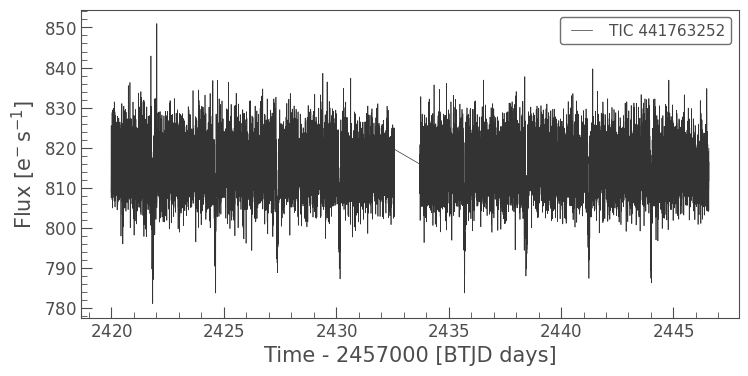

In [22]:
# Light Normalization Test w/ Lightkurve
light_curve = lk.search_lightcurve("TOI-4468")
lc = light_curve[0].download()
#print(lc)
#print(lc[0])
lc.plot()

        time             flux      ...   pos_corr1      pos_corr2   
                                   ...      pix            pix      
------------------- -------------- ... -------------- --------------
-1.3849552370374512  9.9278772e-01 ... -1.5046091e-02  7.4824858e-03
-1.3849472872689486  1.0017411e+00 ... -1.0338770e-02  8.6646769e-03
-1.3849374793095464  9.9621201e-01 ... -1.3194720e-02  3.9000490e-03
-1.3849246723491173  9.9828821e-01 ... -7.4429340e-03  4.8164739e-03
-1.3849068752209086  1.0046227e+00 ... -4.1821147e-03 -4.0071392e-03
-1.3848857405600097  9.9591190e-01 ... -8.0160983e-03  3.2702900e-02
-1.3848706553426382  1.0085318e+00 ... -1.2735224e-02  2.3861583e-02
-1.3848537053064252  1.0103090e+00 ... -8.4979264e-03  3.0122872e-02
-1.3848337627975384  9.9914128e-01 ... -9.1715092e-03  1.5044246e-02
                ...            ... ...            ...            ...
 1.3845158647408997  9.9190408e-01 ... -1.5189065e-02  7.6594921e-03
 1.3845238148013514  1.0143820e+00

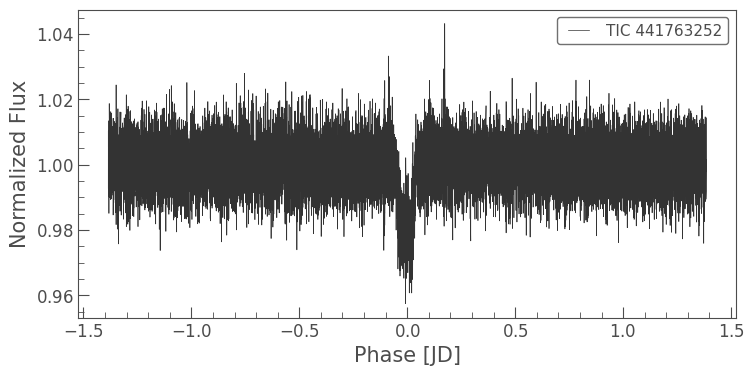

In [23]:
# Phase Folding:
period = 2.770860
t0 = 2430.16
lc_norm = lc.normalize()
#lc_norm.plot()
lc_phased = lc_norm.fold(period = period, epoch_time = t0)
lc_phased.plot()
print(lc_phased)
lctime = np.array(lc_phased[0])
lcflux = np.array(lc_phased[1])

Filename: tess2021204101404-s0041-0000000441763252-0212-s_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   19149R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =                19149 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                

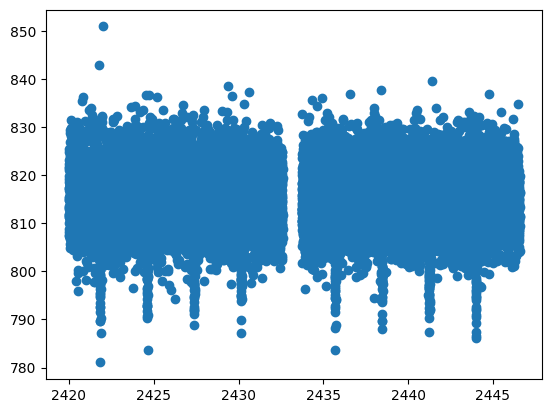

In [21]:
#Data Initialization:
from astropy.io import fits
import matplotlib.pyplot as plt
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

#Initialization of Arrays
flux_clean = []
time_clean = []

fits_filename = 'tess2021204101404-s0041-0000000441763252-0212-s_lc.fits'
hdul = fits.open(fits_filename)
hdul.info()
primary_hdu = hdul[1]

# Get the data (e.g., image or table data)
#data = primary_hdu.data

# Get the header information
header = primary_hdu.header
# Print the header
print(repr(header))
# Access the table data in the second HDU
table_data = hdul[1].data

# Print the names of the columns
#print(table_data.columns.names)
# Access a specific column
time = table_data['TIME']
flux = table_data['PDCSAP_FLUX']
print(flux)
for i in range(len(flux)):
    if not np.isnan(flux[i]):
        flux_clean.append(flux[i])
        time_clean.append(time[i])
time=np.array(time_clean)
flux=np.array(flux_clean)
plt.plot(time,flux,'o')

###### Calculate a keplerspline with the default bkspacing of 2 days between knots: 
#median = np.median(flux)
#flux = flux/median
s = keplersplinev2(time, flux, bkspace = 2)
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(time, flux,'.')
plt.plot(time_clean, s,'o')

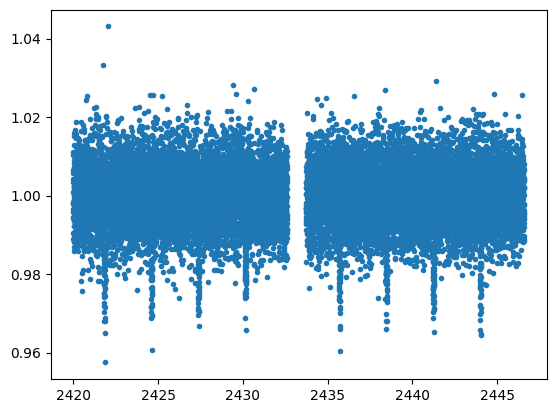

In [5]:
flux_norm = flux/s
plotting = plt.plot(time, flux_norm,'.')
print(plotting)

In [81]:
timesubarrays = np.array_split(time,9)
fluxsubarrays = np.array_split(flux_norm,9)

2035


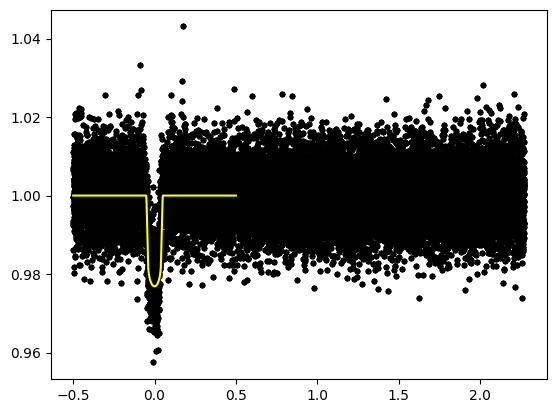

In [44]:
import batman
import numpy as np
import matplotlib.pyplot as plt
#NOTE: ratio of planet radius to stellar radius

params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0                         #time of inferior conjunction
params.per = 2.770860                 #orbital period(days)
params.rp = (12.247/109/.79)          #planet radius (in units of stellar radii)
params.a = 9.84875656                 #semi-major axis (in units of stellar radii)
params.inc = 90.                      #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 0.                         #longitude of periastron (in degrees)
params.limb_dark = "nonlinear"        #limb darkening model
params.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients [u1, u2, u3, u4]

  #times at which to calculate light curve
t = np.linspace(-0.5,0.5,1000)
m = batman.TransitModel(params, t)    #initializes model

flux = flux_norm                    #calculates light curve

inclination = np.linspace(85, 90, 5)

for i in inclination:
        params.inc = i                           #updates planet radius
        new_flux = m.light_curve(params)        #recalculates light curve
        plt.plot(((time - t0+0.5)%period)-0.5, flux_norm, '.', color = 'black')
        plt.plot(t, new_flux, "yellow")

## 